In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('processed_response.zip')

In [3]:
df

,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score,time_stamp,tokenized_responses,stemmed_responses,clean_responses,string
0,12522.0,41.0,The strengths of Plato's approach is his const...,#objectivemorality,2.0,1,"['The', 'strengths', 'of', ""Plato's"", 'approac...","['the', 'strength', 'of', 'plato', 'approach',...","['strength', 'plato', 'approach', 'construct',...",strength plato approach construct whole framew...
1,12522.0,335.0,In the breakout we discussed if outside the ca...,#objectivemorality,3.0,1,"['In', 'the', 'breakout', 'we', 'discussed', '...","['in', 'the', 'breakout', 'we', 'discuss', 'if...","['breakout', 'discuss', 'outsid', 'cave', 'mig...",breakout discuss outsid cave might bigger cave...
2,12522.0,333.0,"I think he's good at reasoning, but he has thi...",#deductivearg,2.0,1,"['I', 'think', ""he's"", 'good', 'at', 'reasonin...","['i', 'think', 'he', 'good', 'at', 'reason', '...","['think', 'good', 'reason', 'circular', 'way',...",think good reason circular way prove point onl...
3,12522.0,318.0,Back to cmmon confusion time: the section 'und...,#objectivemorality,2.0,1,"['Back', 'to', 'cmmon', 'confusion', 'time', '...","['back', 'to', 'cmmon', 'confus', 'time', 'the...","['back', 'cmmon', 'confus', 'time', 'section',...",back cmmon confus time section understand inte...
4,12522.0,315.0,Most difficult weakness is that his position w...,#objectivemorality,2.0,1,"['Most', 'difficult', 'weakness', 'is', 'that'...","['most', 'difficult', 'weak', 'is', 'that', 'h...","['difficult', 'weak', 'posit', 'understand', '...",difficult weak posit understand testabl like i...
...,...,...,...,...,...,...,...,...,...,...
191011,322265.0,1120.0,Definiteness,#algorithmicstrategies,1.0,15539,['Definiteness'],['definit'],['definit'],definit
191012,322265.0,1121.0,I think important propoerties of algorithms in...,#algorithmicstrategies,3.0,15539,"['I', 'think', 'important', 'propoerties', 'of...","['i', 'think', 'import', 'propoerti', 'of', 'a...","['think', 'import', 'propoerti', 'algorithm', ...",think import propoerti algorithm inclid defin ...
191013,322265.0,1126.0,"This is maybe not an additional property, but ...",#algorithmicstrategies,3.0,15539,"['This', 'is', 'maybe', 'not', 'an', 'addition...","['this', 'is', 'mayb', 'not', 'an', 'addit', '...","['mayb', 'addit', 'properti', 'characterist', ...",mayb addit properti characterist good algorith...
191014,322265.0,719.0,comprehensibility. This is related to efficie...,#algorithmicstrategies,3.0,15539,"['comprehensibility', 'This', 'is', 'related',...","['comprehens', 'this', 'is', 'relat', 'to', 'e...","['comprehens', 'relat', 'effici', 'demand', 'd...",comprehens relat effici demand degre concis cl...


In [4]:
df['string'] = df['string'].values.astype('U')

## Transform dataframe into tfidf 

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer()
tfidf_matrix = tfidf_vector.fit_transform(df['string'])
tfidf_matrix

<191016x81542 sparse matrix of type '<class 'numpy.float64'>'
	with 6311506 stored elements in Compressed Sparse Row format>

## Cluster by K means

### 5 clusters

In [6]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

df['cluster'] = np.array(clusters)
terms = tfidf_vector.get_feature_names_out()

CPU times: user 4min 16s, sys: 9.53 s, total: 4min 26s
Wall time: 39.2 s


In [7]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :15]: #replace 6 with n words per cluster
        print(' %s' % terms[ind],end=',')
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: would, system, becaus, peopl, differ, compani, one, level, chang, market, make, also, could, need, product,
Cluster 1 words: data, variabl, would, model, use, valu, probabl, sampl, number, distribut, function, mean, one, test, differ,
Cluster 2 words: use, argument, think, make, one, becaus, evid, would, word, understand, audienc, way, question, exampl, differ,
Cluster 3 words: poll, complet, student, present, 𝜇_i, faciilit, facia, facial, facialex, facialexpress, facien, facil, facevook, facilat, facili,
Cluster 4 words: problem, solut, solv, constraint, use, water, rightproblem, subproblem, differ, identifi, state, goal, breakitdown, one, step,




/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Assessment Score Count by Cluster')

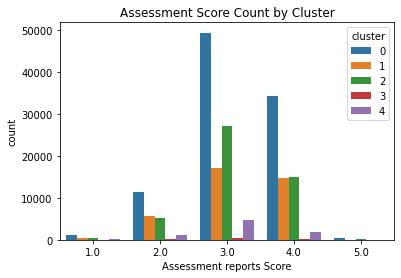

In [8]:
sns.countplot('Assessment reports Score', hue = 'cluster', data = df)
plt.title('Assessment Score Count by Cluster')

### 10 clusters

In [9]:
km_10 = KMeans(n_clusters=10)

%time km_10.fit(tfidf_matrix)

clusters10 = km_10.labels_.tolist()

df['cluster10'] = np.array(clusters10)
terms10 = tfidf_vector.get_feature_names_out()

CPU times: user 6min 20s, sys: 13.5 s, total: 6min 34s
Wall time: 1min


In [10]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km_10.cluster_centers_.argsort()[:, ::-1] 

for i in range(10):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :15]: #replace 6 with n words per cluster
        print(' %s' % terms10[ind],end=',')
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: doc, https, com, googl, edit, document, usp, share, kgi, edu, minerva, spreadsheet, drive, colab, gid,
Cluster 1 words: data, variabl, model, hypothesi, studi, test, observ, use, would, differ, treatment, predict, control, regress, one,
Cluster 2 words: argument, thesi, sentenc, evid, induct, logic, premis, deduct, conclus, true, statement, use, truth, claim, support,
Cluster 3 words: would, peopl, use, one, becaus, think, differ, make, like, also, exampl, could, way, understand, chang,
Cluster 4 words: compani, market, product, custom, busi, risk, cost, invest, price, would, activ, financi, economi, increas, growth,
Cluster 5 words: problem, solut, solv, constraint, water, use, rightproblem, subproblem, identifi, differ, state, goal, breakitdown, one, help,
Cluster 6 words: function, valu, would, number, time, node, vector, algorithm, use, tree, find, matrix, equat, point, list,
Cluster 7 words: poll, complet, student, present, 𝜇_i, faciilit, f

Text(0.5, 1.0, 'Normalized Assessment Score Count by Cluster')

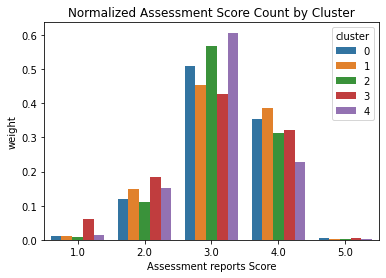

In [11]:
norm_df = df["Assessment reports Score"].groupby(df["cluster"]).value_counts().rename('count').reset_index()
norm_df = norm_df.assign(weight=norm_df['count']/norm_df.groupby('cluster')['count'].transform('sum'))

sns.barplot(x="Assessment reports Score", y="weight", hue = 'cluster', data=norm_df)
plt.title('Normalized Assessment Score Count by Cluster')

- Group 0: quite distributed grades
- Group 1: has the most 4s. CS profs gives a lots of 4s(we can test it through LO matches), or maybe writing these words sound smarter. 
- Group 3: have the most 3s. Business profs usually give 3s. They probably don't know what to grade on? 

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Assessment Score Count by Cluster')

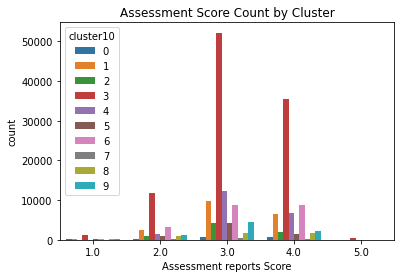

In [12]:
sns.countplot('Assessment reports Score', hue = 'cluster10', data = df)
plt.title('Assessment Score Count by Cluster')

Text(0.5, 1.0, 'Normalized Assessment Score Count by Cluster')

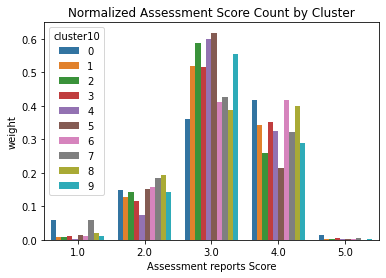

In [13]:
norm_df10 = df["Assessment reports Score"].groupby(df["cluster10"]).value_counts().rename('count').reset_index()
norm_df10 = norm_df10.assign(weight=norm_df10['count']/norm_df10.groupby('cluster10')['count'].transform('sum'))

sns.barplot(x="Assessment reports Score", y="weight", hue = 'cluster10', data=norm_df10)
plt.title('Normalized Assessment Score Count by Cluster')

In [14]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}

svd = TruncatedSVD(n_components=2)
reduced_matrix = svd.fit_transform(tfidf_matrix) 


In [15]:
r_reduced = reduced_matrix[:200]

In [16]:
reduced_matrix.shape

(191016, 2)

In [17]:
import random
sample_index = random.sample(range(1, reduced_matrix.shape[0]), 500)
sample_matrix = reduced_matrix[sample_index]

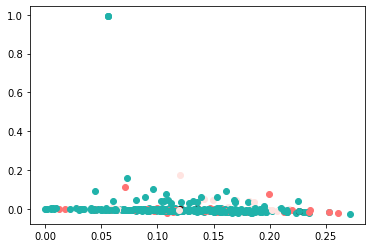

In [18]:
fig, ax = plt.subplots()
for index, instance in enumerate(sample_matrix):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = sample_matrix[index]
    color = labels_color_map[clusters[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()

In [19]:

# pca_num_components = 2
# reduced_data = PCA(n_components=pca_num_components).fit_transform(tfidf_matrix)

In [20]:
# from sklearn.manifold import TSNE

# embeddings = TSNE(n_components=2)
# Y = embeddings.fit_transform(tfidf_matrix)

# LDA 
LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

Three main parts of LDA

1. Dimensionality Reduction: Rather than representing a text T in its feature space as `{Word_i: count(Word_i, T) for Word_i in Vocabulary}`, you can represent it in a topic space as `{Topic_i: Weight(Topic_i, T) for Topic_i in Topics}`.
2. Unsupervised Learning: By doing topic modeling, we build clusters of words rather than clusters of texts. A text is thus a mixture of all the topics, each having a specific weight.
3. Tagging: abstract “topics” that occur in a collection of documents that best represents the information in them.

In [23]:
import gensim
import gensim.corpora as corpora

In [36]:
from ast import literal_eval

df['clean_responses'] = df['clean_responses'].apply(literal_eval)

In [87]:
# Create Dictionary
id2word = corpora.Dictionary(df['clean_responses'])
# Create Corpus
texts = df['clean_responses']
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]


In [88]:
corpus_0 = corpus[0]
for i in range(len(corpus_0)):
    print("Word {} (\"{}\") appears {} time.".format(corpus_0[i][0], id2word[corpus_0[i][0]], corpus_0[i][1]))

Word 0 ("abstract") appears 1 time.
Word 1 ("answer") appears 1 time.
Word 2 ("approach") appears 1 time.
Word 3 ("attack") appears 1 time.
Word 4 ("construct") appears 1 time.
Word 5 ("focus") appears 1 time.
Word 6 ("form") appears 1 time.
Word 7 ("framework") appears 2 time.
Word 8 ("good") appears 1 time.
Word 9 ("hard") appears 1 time.
Word 10 ("instead") appears 1 time.
Word 11 ("knowledg") appears 1 time.
Word 12 ("matt") appears 1 time.
Word 13 ("moral") appears 1 time.
Word 14 ("plato") appears 1 time.
Word 15 ("poll") appears 1 time.
Word 16 ("preparatori") appears 1 time.
Word 17 ("set") appears 1 time.
Word 18 ("specif") appears 1 time.
Word 19 ("strength") appears 1 time.
Word 20 ("veri") appears 1 time.
Word 21 ("weak") appears 1 time.
Word 22 ("whole") appears 1 time.
Word 23 ("would") appears 1 time.


In [49]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.022*"would" + 0.011*"x" + 0.009*"use" + 0.009*"one" + 0.008*"becaus" + '
  '0.006*"water" + 0.006*"function" + 0.005*"exampl" + 0.005*"also" + '
  '0.005*"differ"'),
 (1,
  '0.017*"system" + 0.012*"one" + 0.010*"model" + 0.009*"differ" + '
  '0.008*"level" + 0.008*"becaus" + 0.007*"interact" + 0.007*"chang" + '
  '0.007*"complex" + 0.007*"exampl"'),
 (2,
  '0.015*"use" + 0.010*"would" + 0.008*"differ" + 0.008*"could" + '
  '0.008*"think" + 0.008*"make" + 0.007*"one" + 0.006*"bias" + 0.006*"peopl" + '
  '0.006*"exampl"'),
 (3,
  '0.011*"becaus" + 0.007*"use" + 0.007*"process" + 0.006*"like" + '
  '0.006*"think" + 0.005*"attent" + 0.005*"make" + 0.005*"also" + '
  '0.005*"understand" + 0.005*"time"'),
 (4,
  '0.011*"would" + 0.008*"theori" + 0.008*"make" + 0.007*"use" + 0.007*"peopl" '
  '+ 0.006*"think" + 0.006*"also" + 0.006*"need" + 0.006*"evid" + '
  '0.006*"like"'),
 (5,
  '0.023*"use" + 0.013*"problem" + 0.011*"one" + 0.007*"would" + 0.007*"make" '
  '+ 0.006*"way" + 0.00

In [64]:
import pyLDAvis
# import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis
import os
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()

In [66]:
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/swimmingcircle/Library/Python/3.9/li

In [67]:
pyLDAvis.display(LDAvis_prepared)

In [68]:
pyLDAvis.save_html(LDAvis_prepared, 'lda.html')

In [91]:
from gensim import corpora, models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Build LDA model on tf-idf
lda_model_tf = gensim.models.LdaMulticore(corpus=corpus_tfidf,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_tf.print_topics())

[(0,
  '0.004*"music" + 0.003*"peopl" + 0.003*"use" + 0.003*"capston" + '
  '0.003*"would" + 0.003*"emot" + 0.002*"audienc" + 0.002*"one" + '
  '0.002*"differ" + 0.002*"think"'),
 (1,
  '0.003*"audienc" + 0.003*"peopl" + 0.003*"use" + 0.003*"differ" + '
  '0.003*"think" + 0.003*"would" + 0.003*"one" + 0.002*"way" + 0.002*"word" + '
  '0.002*"emot"'),
 (2,
  '0.003*"use" + 0.003*"would" + 0.002*"one" + 0.002*"becaus" + 0.002*"conrad" '
  '+ 0.002*"activ" + 0.002*"make" + 0.002*"differ" + 0.002*"argument" + '
  '0.002*"think"'),
 (3,
  '0.006*"problem" + 0.003*"think" + 0.003*"differ" + 0.003*"level" + '
  '0.003*"would" + 0.003*"system" + 0.003*"one" + 0.003*"use" + 0.003*"solut" '
  '+ 0.003*"peopl"'),
 (4,
  '0.003*"would" + 0.003*"coffe" + 0.003*"use" + 0.003*"variabl" + 0.003*"x" + '
  '0.002*"differ" + 0.002*"chang" + 0.002*"one" + 0.002*"becaus" + '
  '0.002*"effect"'),
 (5,
  '0.010*"x" + 0.006*"p" + 0.005*"data" + 0.005*"probabl" + 0.004*"distribut" '
  '+ 0.004*"sampl" + 0.004*

In [93]:
LDAvis_prepared_tf = gensimvis.prepare(lda_model_tf, corpus_tfidf, id2word)

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reloa

In [94]:
pyLDAvis.display(LDAvis_prepared_tf)

In [96]:
pyLDAvis.save_html(LDAvis_prepared_tf, 'lda_tf.html')